# Peak Finder

To use: 
1. copy `isotonic_regression_l1_total_order.py` and `peak_finder.py` into your folder
2. do `from peak_finder import peak_finder`
3. do `peak_finder(y,n_peaks)` where `y` is the signal where you want to find peaks, and `n_peaks` is an approximate of the number of peaks

Return values:
`S,x,opt = peak_finder(y,n_peaks)`
1. `S` indices of the peaks
2. `x` an approximation to `y` with only peaks at `S`
3. `opt = np.sum(np.abs(x-y))`


In [111]:
from peak_finder import peak_finder
import numpy as np
import matplotlib.pyplot as plt
import time

In [112]:
def get_toy_example(n, n_peaks=3, noise = 0.01):
    grids = np.linspace(0, np.pi, n+1)
    # Sine function values at the lattice points
    y = np.sin(0.85*grids)*np.sin(n_peaks*grids)**2 + noise*np.random.randn(n+1)
    y[int(n/10)] += 0.25
    y[int(4.1*n/10)] += 0.25
    y[int((9.5*n)/10)] += 0.25
    return y

In [113]:
start = time.time()

n_peaks = 3
y = get_toy_example(200,n_peaks)
S,x,opt = peak_finder(y,n_peaks)

end = time.time()
print(end-start)

0.16013622283935547


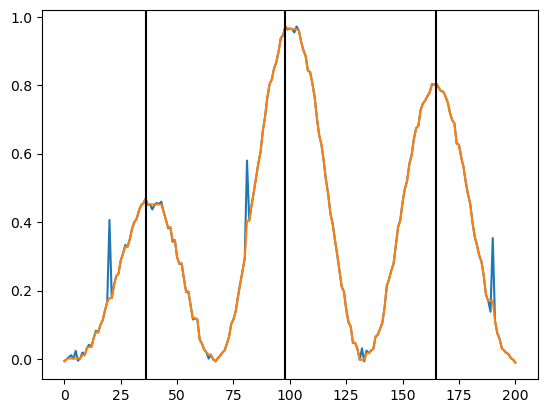

In [114]:

plt.plot(y)
plt.plot(x)
for j in S:
    plt.axvline(x=j,color='black')

In [115]:
def plot_mountains_and_plateau():
    x = np.arange(1000)  # Range from 0 to 999
    y = np.zeros_like(x, dtype=float)  # Initialize y with zeros, as floats

    # First mountain (Gaussian)
    y += 100.0 * np.exp(-0.5 * ((x - 200.0) / 50.0) ** 2)  # Mountain at x=200

    # Second mountain (Sharp, sawtooth-like peak)
    # Define the slope of the ascent and descent
    ascent_slope = 0.8
    descent_slope = -0.9

    # Calculate the ascent and descent of the sawtooth
    ascent = ascent_slope * (x - 666.0 + 50.0 * (x > 666)) * (x > 666) * (x < 716)
    descent = descent_slope * (x - 777.0) * (x >= 716) * (x < 799)
    y += np.maximum(0, ascent + descent)

    # Define the plateau as a flat line between x=400 and x=555
    y[400:556] = 10.0  # Flat plateau at height 10

    return y

y = plot_mountains_and_plateau()
y += np.random.randn(len(y))

In [116]:
start = time.time()

n_peaks = 3
# y = get_toy_example(200,n_peaks)
S,x,opt = peak_finder(y,n_peaks)

end = time.time()
print(end-start)

0.855975866317749


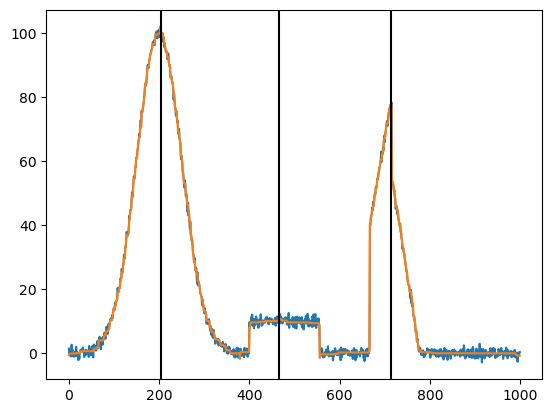

In [117]:

plt.plot(y)
plt.plot(x)
for j in S:
    plt.axvline(x=j,color='black')